**importing liberaries**

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import ReLU,LeakyReLU

In [262]:
# Loading dataset
dataset = pd.read_csv('/content/drive/MyDrive/deep learning material/extended_stress_detection_data.csv')

In [263]:
dataset.shape

(3000, 22)

In [264]:
dataset.head()

,Age,Gender,Occupation,Marital_Status,Sleep_Duration,Sleep_Quality,Wake_Up_Time,Bed_Time,Physical_Activity,Screen_Time,...,Smoking_Habit,Work_Hours,Travel_Time,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Stress_Detection
0,30.0,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Cardio,120.0,180.0,90.0,Low
1,35.0,Female,Marketing Manager,Married,6.0,3.0,6:00 AM,11:00 PM,1.0,3.0,...,No,9.0,2.0,3.0,No,Yoga,110.0,160.0,80.0,Medium
2,40.0,Male,Data Scientist,Divorced,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Strength Training,130.0,200.0,100.0,High
3,35.0,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Cardio,120.0,180.0,90.0,Low
4,29.0,Female,Teacher,Single,8.0,5.0,6:30 AM,10:30 PM,3.0,2.0,...,No,7.0,1.0,4.0,Yes,Yoga,110.0,180.0,90.0,Low


In [265]:
## divide the data into independent and dependent features

x = dataset.iloc[:, 0:21]   # from column index 0 to 20 (21 columns excluding the last one)
y = dataset.iloc[:, 21]     # column at index 21 (the last column, 'Stress_Detection')

In [266]:
x.head()

,Age,Gender,Occupation,Marital_Status,Sleep_Duration,Sleep_Quality,Wake_Up_Time,Bed_Time,Physical_Activity,Screen_Time,...,Alcohol_Intake,Smoking_Habit,Work_Hours,Travel_Time,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level
0,30.0,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,0,No,8.0,1.0,5.0,Yes,Cardio,120.0,180.0,90.0
1,35.0,Female,Marketing Manager,Married,6.0,3.0,6:00 AM,11:00 PM,1.0,3.0,...,1,No,9.0,2.0,3.0,No,Yoga,110.0,160.0,80.0
2,40.0,Male,Data Scientist,Divorced,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,0,No,8.0,1.0,5.0,Yes,Strength Training,130.0,200.0,100.0
3,35.0,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,0,No,8.0,1.0,5.0,Yes,Cardio,120.0,180.0,90.0
4,29.0,Female,Teacher,Single,8.0,5.0,6:30 AM,10:30 PM,3.0,2.0,...,0,No,7.0,1.0,4.0,Yes,Yoga,110.0,180.0,90.0


In [267]:
y.head()

,Stress_Detection
0,Low
1,Medium
2,High
3,Low
4,Low


In [268]:
if 'Occupation' in x.columns:
    x = x.drop('Occupation', axis=1)
if 'Exercise_Type' in x.columns:
    x = x.drop('Exercise_Type', axis=1)

In [269]:
x.head()

,Age,Gender,Marital_Status,Sleep_Duration,Sleep_Quality,Wake_Up_Time,Bed_Time,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Smoking_Habit,Work_Hours,Travel_Time,Social_Interactions,Meditation_Practice,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level
0,30.0,Male,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,1,0,No,8.0,1.0,5.0,Yes,120.0,180.0,90.0
1,35.0,Female,Married,6.0,3.0,6:00 AM,11:00 PM,1.0,3.0,0,1,No,9.0,2.0,3.0,No,110.0,160.0,80.0
2,40.0,Male,Divorced,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,1,0,No,8.0,1.0,5.0,Yes,130.0,200.0,100.0
3,35.0,Male,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,1,0,No,8.0,1.0,5.0,Yes,120.0,180.0,90.0
4,29.0,Female,Single,8.0,5.0,6:30 AM,10:30 PM,3.0,2.0,1,0,No,7.0,1.0,4.0,Yes,110.0,180.0,90.0


In [270]:
# replacing yes no with 1 , 0

x['Smoking_Habit'] = x['Smoking_Habit'].replace({'Yes': 1, 'No': 0})
x['Meditation_Practice'] = x['Meditation_Practice'].replace({'Yes': 1, 'No': 0})


/tmp/ipython-input-765191935.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['Smoking_Habit'] = x['Smoking_Habit'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-765191935.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['Meditation_Practice'] = x['Meditation_Practice'].replace({'Yes': 1, 'No': 0})


In [271]:
## Feature engineering
## dummies >> one hot encoding

Gender = pd.get_dummies(x['Gender'],drop_first=True).astype(int)
Marital_Status = pd.get_dummies(x['Marital_Status'],drop_first=True).astype(int)


In [272]:
Marital_Status


,Married,Single
0,0,1
1,1,0
2,0,0
3,0,1
4,0,1
...,...,...
2995,0,1
2996,0,1
2997,0,1
2998,0,0


In [273]:
# deleting from org x dataset

if 'Marital_Status' in x.columns:
    x = x.drop('Marital_Status', axis=1)
if 'Gender' in x.columns:
    x = x.drop('Gender', axis=1)

In [274]:
# adding inside x dataset
x=pd.concat([x,Gender,Marital_Status],axis=1)

In [275]:
import pandas as pd

# Ensure 'Wake_Up_Time' and 'Bed_Time' columns exist before processing
if 'Wake_Up_Time' in x.columns and 'Bed_Time' in x.columns:
    # Convert AM/PM to datetime objects
    x['Wake_Up_Time'] = pd.to_datetime(x['Wake_Up_Time'])
    x['Bed_Time'] = pd.to_datetime(x['Bed_Time'])

    # Extract hour as a number (0-23)
    x['Wake_Up_Time_Hour'] = x['Wake_Up_Time'].dt.hour
    x['Bed_Time_Hour'] = x['Bed_Time'].dt.hour

    # Drop the original string columns after conversion
    x = x.drop(['Wake_Up_Time', 'Bed_Time'], axis=1)
    print("Successfully converted and dropped 'Wake_Up_Time' and 'Bed_Time' columns.")
else:
    print("Warning: 'Wake_Up_Time' or 'Bed_Time' column not found in x. Skipping conversion and dropping. Make sure this cell is executed before train_test_split if these columns are expected.")

Successfully converted and dropped 'Wake_Up_Time' and 'Bed_Time' columns.


/tmp/ipython-input-63988185.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x['Wake_Up_Time'] = pd.to_datetime(x['Wake_Up_Time'])
/tmp/ipython-input-63988185.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x['Bed_Time'] = pd.to_datetime(x['Bed_Time'])


In [276]:
x.head()

,Age,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Smoking_Habit,Work_Hours,Travel_Time,Social_Interactions,Meditation_Practice,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Male,Married,Single,Wake_Up_Time_Hour,Bed_Time_Hour
0,30.0,7.0,4.0,2.0,4.0,1,0,0,8.0,1.0,5.0,1,120.0,180.0,90.0,1,0,1,7,22
1,35.0,6.0,3.0,1.0,3.0,0,1,0,9.0,2.0,3.0,0,110.0,160.0,80.0,0,1,0,6,23
2,40.0,7.0,4.0,2.0,4.0,1,0,0,8.0,1.0,5.0,1,130.0,200.0,100.0,1,0,0,7,22
3,35.0,7.0,4.0,2.0,4.0,1,0,0,8.0,1.0,5.0,1,120.0,180.0,90.0,1,0,1,7,22
4,29.0,8.0,5.0,3.0,2.0,1,0,0,7.0,1.0,4.0,1,110.0,180.0,90.0,0,0,1,6,22


In [277]:
# replacing the values to 1 , 0
y = y.replace({'High': 1, 'Medium': 1, 'Low': 0})


/tmp/ipython-input-678311703.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'High': 1, 'Medium': 1, 'Low': 0})


In [278]:
## Splitting the dataset into traning set and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [279]:
## Feature Scaling

model =  StandardScaler()
x_train = model.fit_transform(x_train) # ✅ Learns + applies scaling

x_test = model.transform(x_test)  # ✅ Only applies same scaling ,to avoid data leakage

In [280]:
y_train

,Stress_Detection
642,0
700,1
226,1
1697,0
1010,1
...,...
1638,1
1095,0
1130,1
1294,1


In [281]:
x_test.shape

(600, 20)

In [282]:
x_train.shape

(2400, 20)

In [283]:
x_test


array([[-0.99893247,  0.54886205,  0.44926858, ...,  1.09812675,
         1.18130694, -0.44301038],
       [ 0.38874498,  2.03171304, -0.5528551 , ..., -0.91064169,
         0.24777495,  0.73747619],
       [ 0.93775968, -0.63209113, -0.59334495, ...,  1.09812675,
         0.24777495, -0.24626261],
       ...,
       [-0.90413857, -0.20588246,  0.12534981, ...,  1.09812675,
         1.18130694, -0.44301038],
       [-1.27278153,  1.3480033 ,  1.67408641, ...,  1.09812675,
         0.24777495, -0.44301038],
       [-0.45913384,  1.14377832, -1.4436317 , ...,  1.09812675,
        -0.68575704,  0.34398067]])

In [284]:
x_train

array([[ 1.59736728, -0.11708899,  0.22657443, ..., -0.91064169,
         2.11483893, -0.24626261],
       [-0.11418935, -0.20588246, -0.07709941, ..., -0.91064169,
         0.24777495, -0.04951485],
       [ 1.46570907, -0.29467594, -0.88689633, ..., -0.91064169,
         0.24777495,  0.54072843],
       ...,
       [-0.8501587 ,  1.65878046, -2.42551046, ..., -0.91064169,
         0.24777495,  0.54072843],
       [-0.70270152,  1.49007286, -1.69669324, ...,  1.09812675,
        -2.55282102,  0.34398067],
       [ 0.97462398,  1.09938158,  0.37841135, ..., -0.91064169,
         1.18130694, -0.44301038]])

In [285]:
## now lets create the ANN
classifier = Sequential()

In [286]:
## adding the input layer
classifier.add(Dense(units=20,activation='relu'))

In [287]:
## adding first hidden layer
classifier.add(Dense(units=15,activation='relu'))

In [288]:
## adding first hidden layer
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dropout(0.1))

In [289]:
## adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [290]:
##  Early stoping
import tensorflow as tf
from tensorflow import keras
Early_stoping= keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [291]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [292]:

model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=5,epochs=100,callbacks=Early_stoping)

Epoch 1/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6227 - loss: 0.6525 - val_accuracy: 0.7945 - val_loss: 0.4272
Epoch 2/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8093 - loss: 0.4173 - val_accuracy: 0.8323 - val_loss: 0.3925
Epoch 3/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8218 - loss: 0.3939 - val_accuracy: 0.8323 - val_loss: 0.3819
Epoch 4/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 0.3630 - val_accuracy: 0.8361 - val_loss: 0.3769
Epoch 5/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8522 - loss: 0.3577 - val_accuracy: 0.8424 - val_loss: 0.3737
Epoch 6/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8628 - loss: 0.3584 - val_accuracy: 0.8436 - val_loss: 0.3710
Epoch 7/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8683 - loss: 0.3559 - val_accuracy: 0.8235 - val_loss: 0.3827
Epoch 8/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8613 - loss: 0.3373 - val_accu

In [293]:
# history keys
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

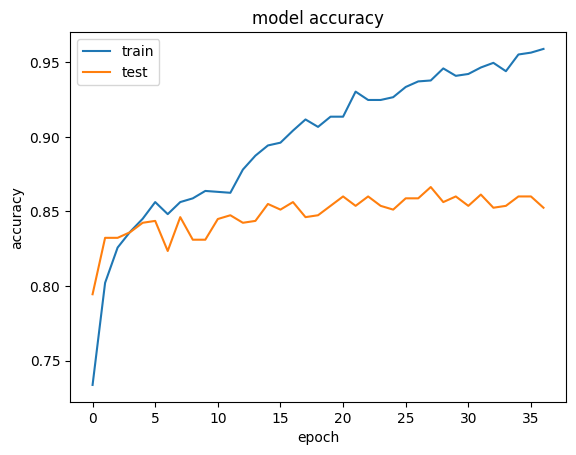

In [294]:
## summary of history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

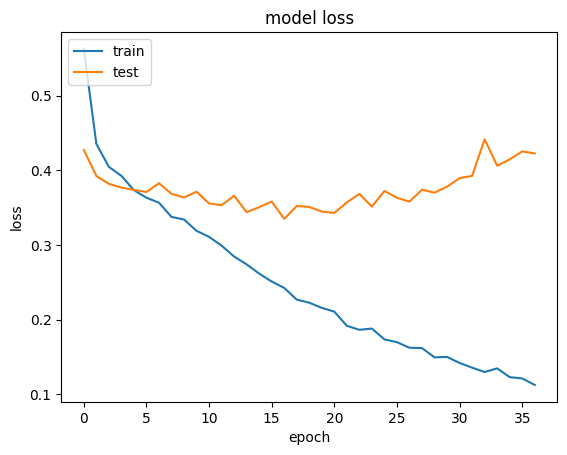

In [295]:
## summary of history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [296]:
# making the prediction and evaluating model
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [297]:
## making the confusion  matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 56,  61],
       [ 33, 450]])

In [298]:
## the accurarcy

score = accuracy_score(y_pred,y_test)
print(score)

0.8433333333333334
